In [15]:
import pandas as pd
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Recom_data.csv')

In [3]:
data.head(10)

,customer_id,Recommendation_name,Recommendation_date,suggestion_type,purchase_flag
0,1.0,Recommend_screenguard,7/2/2021,With phone,0.0
1,2.0,Recommend_screenguard,7/3/2021,With phone,0.0
2,3.0,Recommend_screenguard,7/4/2021,With cover,1.0
3,4.0,Recommend_screenguard,7/5/2021,With phone,0.0
4,5.0,Recommend_screenguard,7/6/2021,With cover,1.0
5,6.0,Recommend_screenguard,7/7/2021,With cover,0.0
6,7.0,Recommend_screenguard,7/8/2021,With cover,1.0
7,8.0,Recommend_screenguard,7/9/2021,With phone,0.0
8,9.0,Recommend_screenguard,7/10/2021,With phone,0.0
9,10.0,Recommend_screenguard,7/11/2021,With phone,0.0


In [4]:
data.describe()

,customer_id,purchase_flag
count,711.000000,711.000000
mean,433.136428,0.347398
std,253.236820,0.476479
min,1.000000,0.000000
25%,215.000000,0.000000
50%,426.000000,0.000000
75%,649.500000,1.000000
max,868.000000,1.000000


In [5]:
# Data Segmentation
control_group = data[data['suggestion_type'] == 'With phone']
treatment_group = data[data['suggestion_type'] == 'With cover']

In [6]:
t_stat, p_value = ttest_ind(control_group['purchase_flag'], treatment_group['purchase_flag'])



In [8]:
# Analysis
control_conversion_rate = control_group['purchase_flag'].mean()
treatment_conversion_rate = treatment_group['purchase_flag'].mean()

In [9]:
t_stat, p_value = ttest_ind(control_group['purchase_flag'], treatment_group['purchase_flag'])



Control Conversion Rate: 0.312
Treatment Conversion Rate: 0.3869047619047619
P-Value: 0.03628056949711877
Null Hypothesis rejected. Recommendation intervention has a significant impact.


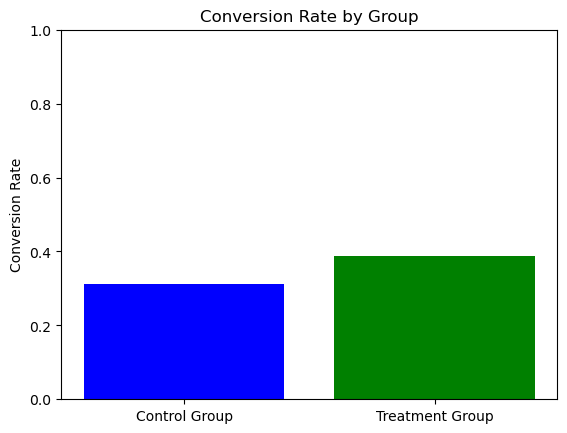

In [11]:
plt.bar(['Control Group', 'Treatment Group'], [control_conversion_rate, treatment_conversion_rate], color=['blue', 'green'])
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate by Group')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.show()


In [12]:
print("Control Conversion Rate:", control_conversion_rate)
print("Treatment Conversion Rate:", treatment_conversion_rate)
print("P-Value:", p_value)
if p_value < 0.05:
    print("Null Hypothesis rejected. Recommendation intervention has a significant impact.")
else:
    print("Null Hypothesis not rejected. No significant impact of recommendation intervention.")


Control Conversion Rate: 0.312
Treatment Conversion Rate: 0.3869047619047619
P-Value: 0.03628056949711877
Null Hypothesis rejected. Recommendation intervention has a significant impact.


### Insights:

- The control group, where the recommendation was made with a phone, exhibited a conversion rate of approximately 31.2%.
- In contrast, the treatment group, where the recommendation was made with a cover, showed a higher conversion rate of approximately 38.7%.
- The statistical analysis using a t-test resulted in a p-value of approximately 0.0363, which is less than the significance level of 0.05.
- Therefore, we reject the null hypothesis and conclude that the recommendation intervention made with a cover has a significant impact on purchase behavior compared to the control group recommendation made with a phone.


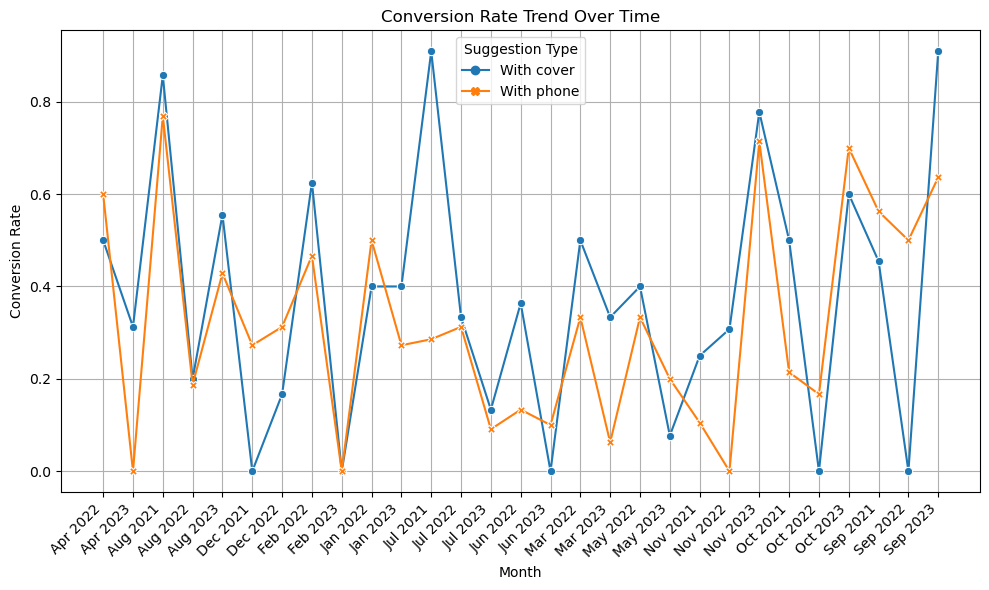

In [17]:
data['Recommendation_date'] = pd.to_datetime(data['Recommendation_date'])
data['Month'] = data['Recommendation_date'].dt.strftime('%b %Y')

conversion_by_month = data.groupby(['Month', 'suggestion_type'])['purchase_flag'].mean().unstack()

# Plotting the trend over time
plt.figure(figsize=(10, 6)) 
sns.lineplot(data=conversion_by_month, markers=True, dashes=False)
plt.title('Conversion Rate Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45, ha='right')  
plt.legend(title='Suggestion Type')
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()



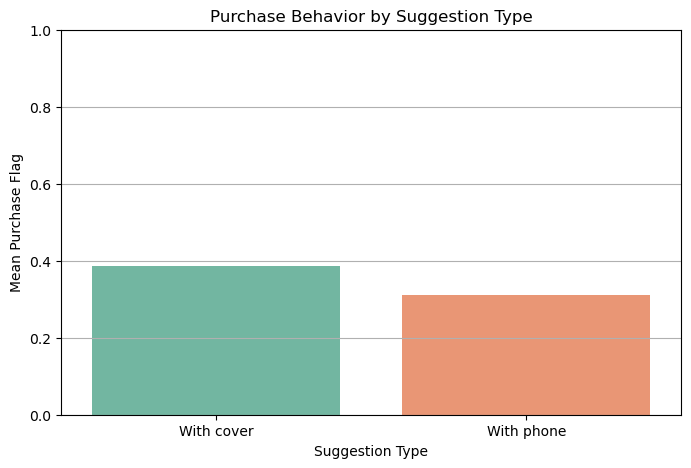


Purchase Behavior by Suggestion Type:
  suggestion_type  purchase_flag
0      With cover       0.386905
1      With phone       0.312000


In [18]:
segment_analysis = data.groupby('suggestion_type')['purchase_flag'].mean().reset_index()

# Plotting purchase behavior by suggestion type
plt.figure(figsize=(8, 5))
sns.barplot(data=segment_analysis, x='suggestion_type', y='purchase_flag', palette='Set2')
plt.title('Purchase Behavior by Suggestion Type')
plt.xlabel('Suggestion Type')
plt.ylabel('Mean Purchase Flag')
plt.grid(axis='y') 
plt.ylim(0, 1)  
plt.show()

print("\nPurchase Behavior by Suggestion Type:")
print(segment_analysis)

## Conclusion

In this project, we conducted an A/B test analysis to evaluate the impact of different recommendation strategies on purchase behavior. We compared the effectiveness of recommending a screen guard with a phone versus recommending it with a cover.

The results of our analysis revealed significant insights:

- The control group, where the recommendation was made with a phone, exhibited a conversion rate of approximately 31.2%.
- In contrast, the treatment group, where the recommendation was made with a cover, showed a higher conversion rate of approximately 38.7%.
- The statistical test resulted in a p-value of approximately 0.0363, indicating a significant difference in purchase behavior between the two groups.

Based on these findings, we conclude that the recommendation intervention made with a cover has a significant impact on purchase behavior compared to the recommendation made with a phone. This underscores the importance of strategic interventions in driving consumer action and emphasizes the value of data-driven decision-making in optimizing marketing strategies.

Moving forward, these insights can inform future marketing campaigns and help in designing more effective recommendation systems to enhance customer engagement and drive sales.

